#Cloning the pyRDDLGym repository to obtain the pyRDDLGym infrstructure

In [1]:
!git clone https://github.com/ataitler/pyRDDLGym.git

Cloning into 'pyRDDLGym'...
remote: Enumerating objects: 9562, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 9562 (delta 106), reused 96 (delta 54), pack-reused 9401
Receiving objects: 100% (9562/9562), 7.35 MiB | 7.62 MiB/s, done.
Resolving deltas: 100% (6430/6430), done.


#Initializing environment in pyRDDLGym

In [2]:
#Changing the working directory to the "pyRDDLGym" directory
%cd /content/pyRDDLGym

/content/pyRDDLGym


In [3]:
#Installing requirements_jax.txt
!pip install -r requirements_jax.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 kB 31.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


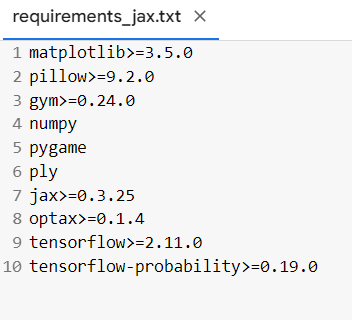

In [4]:
#Importing the required packages
import jax
import optax
from pyRDDLGym import ExampleManager
from pyRDDLGym import RDDLEnv
from pyRDDLGym.Core.Jax.JaxRDDLBackpropPlanner import JaxRDDLBackpropPlanner, JaxStraightLinePlan



/content/pyRDDLGym/pyRDDLGym/Examples/ExampleManager.py:90: DeprecationWarning: invalid escape sequence '\d'
  x = re.search("instance\d+.*", file)


In [6]:
# specify the model
EnvInfo = ExampleManager.GetEnvInfo("UAV mixed")
myEnv = RDDLEnv.RDDLEnv(domain="/content/pyRDDLGym/pyRDDLGym/Examples/UAV/Mixed/domain.rddl", instance="/content/pyRDDLGym/pyRDDLGym/Examples/UAV/Mixed/instance0.rddl")
model = myEnv.model

Generating LALR tables


In [7]:
# initialize the planner
# note that actions should be constrained to [-1, 1] for Racecar
planner = JaxRDDLBackpropPlanner(
    model,
    plan=JaxStraightLinePlan(),
    batch_size_train=32,
    rollout_horizon=5,
    optimizer=optax.adam,
    optimizer_kwargs={'learning_rate': 0.0001})

/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:844: UserWarning: Initial values of pvariables will be cast to real.
  self.compiled = JaxRDDLCompilerWithGrad(
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:55: UserWarning: Using the replacement rule: a >= b --> sigmoid(a - b)
  '>=': logic.greaterEqual(),
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLLogic.py:218: UserWarning: Using the replacement rule: a >= b --> sigmoid(a - b)
  jax_geq, jax_param = self.greaterEqual()
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLLogic.py:226: UserWarning: Using the replacement rule: a > b --> sigmoid(a - b)
  jax_gre, jax_param = self.greater()
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:58: UserWarning: Using the replacement rule: a > b --> sigmoid(a - b)
  '>': logic.greater(),
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:59: UserWarning: Using the replacement rule: a == b --> sech^2(b - a)
  '==': logic.equal(),
/content/pyR

In [8]:
!python --version

Python 3.10.11


In [9]:
# train for 1000 epochs using gradient ascent 
for callback in planner.optimize(jax.random.PRNGKey(42), epochs=1000, step=10):
    print('step={} train_return={:.6f} test_return={:.6f}'.format(
          str(callback['iteration']).rjust(4),
          callback['train_return'],
          callback['test_return']))

step=   0 train_return=-432.954895 test_return=-432.955017
step=  10 train_return=-432.954834 test_return=-432.954956
step=  20 train_return=-432.954712 test_return=-432.954926
step=  30 train_return=-432.954651 test_return=-432.954895
step=  40 train_return=-432.954559 test_return=-432.954865
step=  50 train_return=-432.954498 test_return=-432.954834
step=  60 train_return=-432.954407 test_return=-432.954834
step=  70 train_return=-432.954346 test_return=-432.954803
step=  80 train_return=-432.954254 test_return=-432.954742
step=  90 train_return=-432.954163 test_return=-432.954742
step= 100 train_return=-432.954102 test_return=-432.954712
step= 110 train_return=-432.954071 test_return=-432.954681
step= 120 train_return=-432.953979 test_return=-432.954651
step= 130 train_return=-432.953857 test_return=-432.954590
step= 140 train_return=-432.953766 test_return=-432.954559
step= 150 train_return=-432.953583 test_return=-432.954529
step= 160 train_return=-432.953522 test_return=-432.9544

In [10]:
!pip install cloudpickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import cloudpickle as pickle

# Serialize the planner
with open('trained_planner.pkl', 'wb') as f:
    pickle.dump(planner, f)

# Deserialize the planner
with open('trained_planner.pkl', 'rb') as f:
    planner = pickle.load(f)

In [12]:
# Get the final action sequence
final_params = callback['params']
final_plan = planner.get_action(jax.random.PRNGKey(42), final_params, 0, None)
print("Final Plan:", final_plan)

Final Plan: {'set-phi___a1': 0.100072175, 'set-theta___a1': 0.0846788}
